# 01 - 정확도(Accuracy)
---

$정확도(Accuracy)\,=\,\frac{예측\,결과가\,동일한\,데이터\,건수}{전체\,예측\,데이터\,건수}$

> 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표입니다.\
  하지만, 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있기 때문에 
  정확도 수치하나만 가지고 성능을 평가하지는 않습니다
 

- titanic데이터를 예로 들었을 때 남자보다 여자의 생존확률이 확실히 더 높습니다.
따라서 최종 예측률이 80%라고 해도 무조건 성별이 여자인 경우 무조건 생존으로, 남자인 경우 사망에 가까운 예측을 보일 수 있습니다. 그래서, 성별 조건 하나만을 가지고 결정하는 별 거 아닌 알고리즘도 높은 정확도를 보일 수 있습니다
- 특히, 정확도는 불균형한 레이블 값 분포에서 ML모델의 성능을 판단할 경우, 적합한 평가 지표가 아닙니다\
100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터의 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML모델도 정확도가 90%가 될 수 있습니다.






In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X, y):
        pass
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):의 분포도
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런 내장 데이터 세트
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


# 02 - 오차 행렬(Comfusion Matrix)
---

### 정의
> 학습된 분류 모델의 에측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표입니다.
  예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 알 수 있습니다

- 예를 들어 TN은 True, Negative를 나타냅니다
- 앞의 True는 예측값과 실제갑이 맞았다는 것을 의미하고, 뒤의 Negative는 예측값이 Negative라는 의미입니다.

### 예시
|Actual Class|Negative(0)|Positive(0)
|---|---|---|
|Negative(0)|TN(True Negative)|FP(False Positive)|
|Positive(1)|FN(Fasle Negative)|TP(True Positive)|

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)  # 함수 사용하면 뽑아 줌. 값은 해당하는 갯수를 의미함.

array([[405,   0],
       [ 45,   0]], dtype=int64)

위의 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도, 정밀도, 재현율을 알 수 있습니다.

### 정확도(Accuracy)

$정확도\,=\,예측\,결과와\,실제\,값이\,동일한\,건수/전체\,데이터\,수\,=\,(TN\,+\,TP)\,/\,(TN\,+\,FP\,+\,FN\,+\,TP)$

- 정확도는 예측 값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정되므로 TN과 TP에 의해 좌우됩니다
- 문제는 Negative인 건이 굉장히 많고 positive인 건이 상대적으로 너무 작다면 Negative로 예측하는 경향이 강해집니다
- TN은 매우 커지고, TP는 매우 작아지게 됩니다. 또한 Negative로 예측할 때 정확도가 높기 떄문에 FN이 매우 작고, FP 역시 매우 작아집니다.
- 결과적으로 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류가 생기게 됩니다.
- 불균형한 데이터 세트에 적용시킬 방법이 필요함.




# 03. 정밀도(Precision)와 재현율(Recall)
---

정밀도와 재현율은 Positiive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표입니다.

### 정밀도
> $ 정밀도\,=\,TP\,/\,(FP\,+\,TP)$

예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율입니다.\
Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불립니다\
재현율이 보통은 상대적으로 중요한 업무가 많지만 스팸메일 여부를 판단하는 모델의 경우 실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우 메일을 아예 받지 못하게 돼 업무에 차질이 생깁니다.

### 재현율
>  $ 재현율\,=\,TP\,/\,(FN\,+\,TP)$

실제값이 Positive인 대상 중에 예측과 실제 값이 positive로 일치한 데이터의 비율입니다.\
민감도(sensitivity) 또는 TPR(True Positive Rate)라고도 불립니다.\
재현율이 중요 지표인 경우는 실제 positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우입니다.\
예를 들어 암 판단 모델 같은 경우 실제 Positive인 암 환자를 Negative 음성으로 잘못 판단했을 경우 생명이 오가는 문제이기 때문입니다\
건강한 환자를 Positive 양성으로 예측한 경우에는 재검사를 하는 수준의 비용이 소모될 것이 때문에 위험도에서 다릅니다.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confustion = confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy,precision,recall))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)  # 단순한 식별자 수준의 피처 제거
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

lr_clf = LogisticRegression(solver='liblinear')

titanic_df=pd.read_csv('02-titanic/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [ ]:
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

> 보통 precision과 recall 값이 둘 다 높을 때가 좋은 모델이라고 볼 수 있습니다

### 정밀도/재현율 트레이드오프

##### Trade-Off
분류하려는 업무의 특성상 징밀도나 재현율이 특별히 강조돼야 할 경우\
분류의 결정 입곗값(Threshold)을 조정해 정밀도/재현율의 수치를 높일 수 있습니다\
하지만 정밀도와 재현율은 상호 보완적이기 때문에 강제로 한 쪽을 높이면 하나의 수치가 떨어지기 쉽습니다.\
이를 정밀도/재현율의 Trade-off라고 부릅니다.

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는 지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구합니다.\
임계값을 0.5, 즉 50%로 정하고 이보다 클 경우 positive, 작은 경우 Negative로 결정하게 됩니다.

In [28]:
pred_proba = lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape),'\n')
print('pred_proba array에서 앞 3개만 샘플로 추출\n',pred_proba[:3],'\n')

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape : (179, 2) 

pred_proba array에서 앞 3개만 샘플로 추출
 [[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]] 

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935226 0.55064774 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429644 0.13570356 0.        ]]


In [31]:
from sklearn.preprocessing import Binarizer

X=[[1, -1, 2],
   [2, 0, 0],
   [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


##### 정밀도와 재현율의 맹점

> Threshold 값이 커지고 작아짐에 따라 Positive에 속해지는 값들의 분포가 달라지기 때문에 정확도와 재현율 값이 바뀌게 됩니다.(반비례)
  업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함.

# 04. F1 Score
--- 

정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.

$ F1\,=\,\frac{2}{\frac{1}{recall}+\frac{1}{precision}}\,=\,2\,*\,\frac{precision*recall}{precision+recall}$

In [32]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 Score: {0:.4f}'.format(f1))

F1 Score: 0.7966


In [33]:
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    # threshods list객체 내의 값을차례로 iteration하면서 Evaluation수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test,custom_predict)

In [37]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    #F1 Score 추가
    f1 = f1_score(y_test,pred)
    
    print('Confusion Matrix')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f},재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
Confusion Matrix
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042,재현율: 0.8197, F1: 0.7576
임곗값: 0.45
Confusion Matrix
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869,재현율: 0.7869, F1: 0.7869
임곗값: 0.5
Confusion Matrix
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246,재현율: 0.7705, F1: 0.7966
임곗값: 0.55
Confusion Matrix
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654,재현율: 0.7377, F1: 0.7965
임곗값: 0.6
Confusion Matrix
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980,재현율: 0.7213, F1: 0.8000


> 위 결과에서는 F1 score는 threshold 0.6일 때 가장 좋지만 재현율이 많이 감소하고 있기 때문에 고려해줘야함

# 05. ROC곡선과 AUC값
---

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다.\
ROC(Receiver Operating Characteristic Curve)곡선은 우리말로 수신자 판단 곡선으로 불립니다.\
ROC곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선입니다.\
FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타납니다.\
TPR : 재현율;민감도\
민감도에 대응하는 지표로 TNR(True Nagative Rate)라고 불리는 특이성(Specificity)이 있습니다.

$TNR\,=\,\frac{TN}{(FP\,+\,TN)}$

$FPR\,=\,\frac{FP}{(FP\,+\,TN)}$

위 식과 같으므로 FPR은 1-TNR(특이성)으로 표현됩니다.

임계값을 0부터 1까지 변화시키면서 FPR을 구하고 구한 FPR 값의 변화에 따른 TPR 값을 구하는 것이 바로 ROC 곡선 입니다.

In [38]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일떄의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곘값 배열의 index: ', thr_index)
print('샘플 index로 추출한 임곗값: ',np.round(thresholds[thr_index],2) )

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곘값 배열의 index:  [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


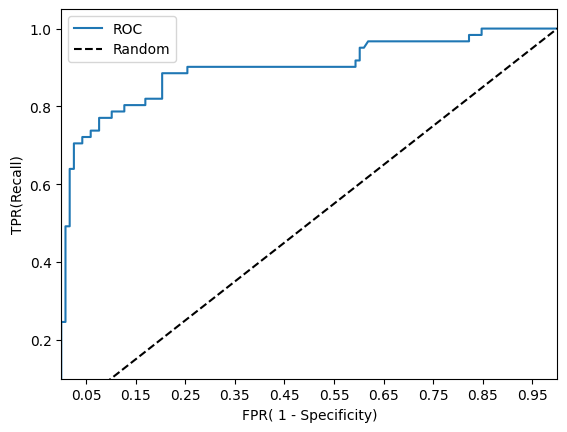

In [41]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1단위로 변경, X, Y축 명 설정 등
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0.1)
    plt.xlabel('FPR( 1 - Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

> 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한
  AUC(Area Under Curve) 값으로 결정합니다. ROC 커브의 밑면적으로 일반적으로 1에 가까울수록 좋은 수치입니다.\
  AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건입니다.\
  가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할 수록 직사각형에 가까운 곡선이 되며 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻을 수 있게 됩니다!

In [42]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [43]:
def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('Confusion Matrix')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f},재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))